In [7]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
ipl_data = pd.read_csv("matches.csv")

In [15]:
ipl_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


shape attribute gives us tuple containing number of rows and columns of dataframe.For this
dataframe rows represent number of matches and column represents various details about the
team and the match.

In [16]:
ipl_data.shape 

(756, 18)

In [17]:
# getting frequency of player or man of the match
ipl_data["player_of_match"].value_counts()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

In [19]:
# top 5 players with most man of the match awards
ipl_data["player_of_match"].value_counts()[0:5]


CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64

In [20]:
name_of_players = ipl_data["player_of_match"].value_counts()[0:5].index
mom_number = ipl_data["player_of_match"].value_counts()[0:5]

Text(0.5, 0, 'Player Name')

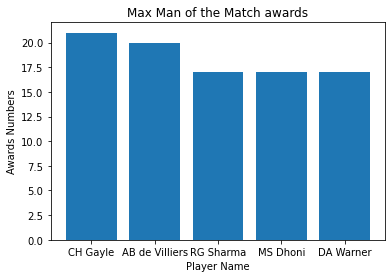

In [21]:
#plotting a bar plot for these 5 players with most man of the match
plt.bar(name_of_players, mom_number)
plt.title("Max Man of the Match awards")
plt.ylabel("Awards Numbers")
plt.xlabel("Player Name")

<AxesSubplot:ylabel='player_of_match'>

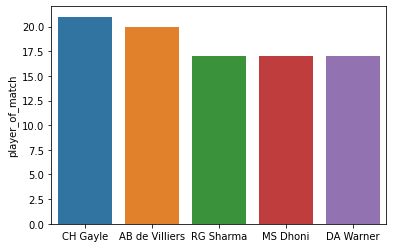

In [23]:
sns.barplot(x = name_of_players, y = mom_number)

In [24]:
#finding out how many matches resulted in proper win/loss and how many did not
ipl_data["result"].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [25]:
#finding out which team won most number of tosses
ipl_data["toss_winner"].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [26]:
#plotting above data of toss winner using bar plot
team_name = ipl_data["toss_winner"].value_counts()[:5].index
toss_number = ipl_data["toss_winner"].value_counts()[:5]


Text(0.5, 0, 'Team name')

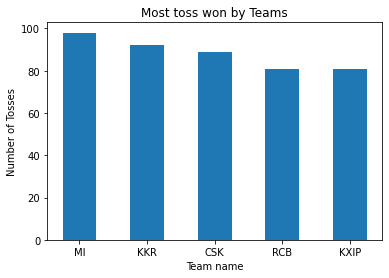

In [27]:

plt.bar(team_name,toss_number,width = 0.5)
plt.xticks(ticks = ['Mumbai Indians', 'Kolkata Knight Riders', 'Chennai Super Kings',
       'Royal Challengers Bangalore', 'Kings XI Punjab'
       ], labels = ["MI", "KKR", "CSK", "RCB", "KXIP"])
plt.title("Most toss won by Teams")
plt.ylabel("Number of Tosses")
plt.xlabel("Team name")

In [28]:
#How many times did the team batting first won
first_won= (ipl_data["win_by_runs"] != 0)
ipl_data["winner"][first_won].value_counts()



Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

Text(0.5, 1.0, 'Winning by batting Second')

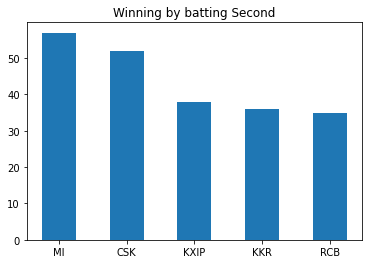

In [29]:
#plotting top 5 teams which have most by batting first

x = ipl_data["winner"][first_won].value_counts()[:5].index
y = ipl_data["winner"][first_won].value_counts()[:5]
plt.bar(x,y, width = 0.5)
plt.xticks(ticks = x,
    labels = ["MI","CSK","KXIP", "KKR", "RCB"])
plt.title("Winning by batting Second")

Text(0, 0.5, 'Matches')

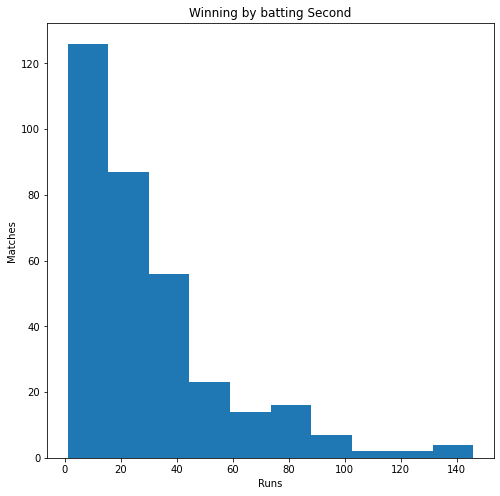

In [30]:
#making histogram depicting range of runs in which teams have won 
plt.figure(figsize = (8,8))
plt.hist(ipl_data["win_by_runs"][first_won])
plt.title("Winning by batting Second")
plt.xlabel("Runs")
plt.ylabel("Matches")

Text(0.5, 1.0, 'Winning by batting First')

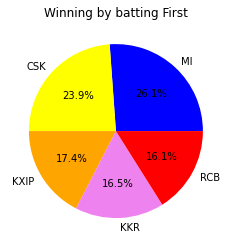

In [34]:
#plotting pie chart for team who won batting first
labels = ["MI","CSK","KXIP", "KKR", "RCB"]
color = ["Blue", "Yellow", "Orange", "Violet", "Red"]

plt.pie(y,colors = color , labels = labels, autopct = "%0.1f%%")
plt.title("Winning by batting First")

In [31]:
# Analysing team won by batting second
second_won = ipl_data["win_by_wickets"] !=0
team_name = ipl_data[second_won]["winner"].value_counts()[:5]
team_name

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Name: winner, dtype: int64

Text(0, 0.5, 'Number of Matches')

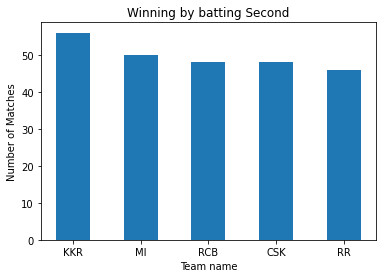

In [33]:
#plotting above data in bar plot
plt.bar(team_name.index, team_name, width = 0.5)
plt.xticks(ticks = team_name.index, labels = ["KKR", "MI", "RCB", "CSK", "RR"])
plt.title("Winning by batting Second")
plt.xlabel("Team name")
plt.ylabel("Number of Matches")

Text(0.5, 1.0, 'Winning by batting Second')

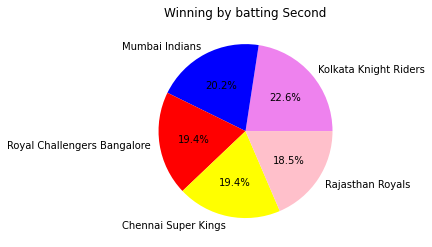

In [35]:
#plotting above data in pie chart
labels = team_name.index
color = ["Violet", "Blue", "Red","Yellow", "Pink"]
plt.pie(team_name, colors = color , labels = labels, autopct = "%0.1f%%")
plt.title("Winning by batting Second")

In [36]:
# matches which happened per season
matches_per_season = ipl_data["season"].value_counts()
matches_per_season

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [37]:
# number of matches played in each city
matches_in_city = ipl_data["city"].value_counts()
matches_in_city

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [38]:
# how many times team who have won the toss have actually won the match
toss_match_win = ipl_data["toss_winner"] == ipl_data["winner"]
toss_match_win.value_counts()

True     393
False    363
dtype: int64

([<matplotlib.patches.Wedge at 0x7f3707cd2550>,
 [Text(-0.06852205779568263, 1.0978637108473188, 'Team Won'),
  Text(0.06852195500626306, -1.097863717262812, 'Team lost')],
 [Text(-0.037375667888554155, 0.5988347513712647, '52.0%'),
  Text(0.03737561182159803, -0.5988347548706248, '48.0%')])

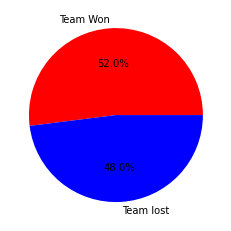

In [41]:
#plotting a pie chart depicting how many times team that won toss have won the match
labels = ["Team Won", "Team lost"]
color = ["red", "blue"]
plt.pie(toss_match_win.value_counts(), colors = color,labels = labels,autopct = "%0.1f%%")

As we can see in above pie chart team who have won the toss have won match only for 52% of the 
matches,so this shows there is no strong correlation between winning toss and winning matches